In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif

In [140]:
from keras.models import Sequential
from keras.layers import Dense

In [141]:
# load data file
data = pd.read_csv('/home/DAVIDSON/jiqian/Workspace/IS/CancerBioInfo/Data Processing/data_processed.csv')

In [142]:
label = data['PATH_N_STAGE']

### Run ANOVA F-value

This move recalculate ANOVA F-value for all features so that the order of the features to include in the model best reflect difference between groups instead of within group.

In [143]:
f_values, p_values = f_classif(data.iloc[:,1:],data['PATH_N_STAGE'])
f_pd = pd.DataFrame(f_values, columns = ['F-value'])

In [144]:
# create a new dataframe with the feature names and F-values
fnf = pd.DataFrame({'feature': data.iloc[:,1:].columns, 'F-value': f_values})

# sort the dataframe in descending order based on the F-values
sorted_fnf = fnf.sort_values('F-value', ascending=False)

columns = sorted_fnf['feature']

selected = data[columns]
data = selected
data["PATH_N_STAGE"] = label

### Split data into train set and test set

In [145]:
# Split the data into 80%/20%
data_train, data_test = train_test_split(data, test_size = 0.2, random_state=42)
data_train = data_train.reset_index(drop = True)
data_test = data_test.reset_index(drop = True)

In [146]:
X = data_train.iloc[:,:data.shape[1]-1]
y = data_train['PATH_N_STAGE']

### Run ANOVA F-value again

In [147]:
f_values, p_values = f_classif(X,y)
f_pd = pd.DataFrame(f_values, columns = ['F-value'])

In [148]:
# create a new dataframe with the feature names and F-values
fnf = pd.DataFrame({'feature': X.columns, 'F-value': f_values})

# sort the dataframe in descending order based on the F-values
sorted_fnf = fnf.sort_values('F-value', ascending=False)

columns = sorted_fnf['feature']

selected = X[columns]
X = selected
X

,M_C16ORF91,M_CTNNAL1,M_MAP6D1,M_HIST1H2AK,M_ASH1L-AS1,M_HIST1H3J,M_SPATA46,M_GOLGA1,M_PRSS27,M_HIST1H2BN,...,M_RAD9A,M_RPA4,M_BBC3,M_HOTAIR,M_DUX4L6,M_KISS1R,M_KCNJ9,M_PIGL,M_LOC100129935,M_OR10G9
0,0.8792,-0.0361,-0.3510,-0.3868,0.0693,-0.2442,-0.6439,0.8551,0.1356,1.2886,...,0.4958,-0.2268,-0.2790,-0.1641,5.0093,-0.1309,3.4446,0.3162,-0.0489,-0.0504
1,1.1363,-0.2450,-0.2738,-0.1765,0.3303,0.3021,0.2213,0.1103,-0.0034,-0.7416,...,-0.4151,-0.1522,1.4193,2.6129,-0.1881,-0.2389,1.4233,-0.0742,-0.0489,-0.0504
2,-0.7364,-0.3339,-1.1468,-0.1550,0.1437,-0.6287,-0.6439,-0.7200,-0.2643,-0.3989,...,-0.2748,-0.1527,0.1968,-0.3996,-0.1881,-0.1954,-0.7553,-0.1914,-0.0489,-0.0504
3,-0.9999,-1.2376,-0.4907,-0.2636,-0.2875,-0.6287,3.5319,0.7420,0.0393,-1.5120,...,-0.3144,-0.5817,-0.6945,0.3986,-0.1881,-0.2389,0.7469,0.5225,-0.0489,-0.0504
4,2.6742,-0.2704,-0.6972,-0.7952,-0.2508,-0.6287,-0.6439,-0.4717,-0.6117,-0.6322,...,0.9930,0.0924,-0.6307,1.0482,-0.1881,-0.1363,-0.1854,-0.6224,-0.0489,-0.0504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,-1.3892,0.2992,-0.8179,-0.3634,-0.8512,-0.0060,0.5137,0.3913,-0.5895,-0.2057,...,-0.7982,-0.2943,-0.5631,-0.4145,-0.1881,-0.2098,-0.1075,-0.6982,-0.0489,-0.0504
329,-0.6168,-0.5563,0.1017,-0.1894,0.1920,-0.6287,0.3637,0.0425,0.3491,-0.9687,...,0.1278,-0.4566,-0.7463,0.1092,-0.1881,-0.2008,-0.3324,0.3953,-0.0489,-0.0504
330,0.8713,1.3086,0.9111,1.4000,1.0178,-0.1033,-0.6439,3.4720,0.5115,0.9060,...,1.6843,0.0245,-0.1362,-0.3681,3.3634,-0.0913,-0.7553,1.8720,-0.0489,-0.0504
331,-1.1250,1.3591,-0.6607,-0.1890,-0.9390,0.5643,1.0194,-0.5864,-0.4240,-0.0317,...,-1.1615,-0.4441,-0.6757,-0.4448,-0.1881,-0.2389,-0.7553,-0.8009,-0.0489,-0.0504


### Neural Network

According to the paper, An MLP architecture was used as follows. 
1. An input layer with 1000 neurons and Rectified Linear Unit (ReLU) activation function. 
2. A second layer with two neurons and ReLU activation function. 
3. The output layer with one neuron and a sigmoid activation function.

We will use this preliminary model described in the paper to perform Neural Network Classficiation

In [180]:
# Define the model architecture
model = Sequential()
model.add(Dense(1000, input_dim=data_train.iloc[:,:1535].shape[1], activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [181]:
X = data_train.iloc[:,:1535]
npX = X.to_numpy()
# We need to convert y into binarized labels
npy = (y-1).to_numpy(dtype = int)

In [182]:
#Fit the model
history = model.fit(npX,npy, epochs = 20)

Epoch 1/20
11/11 [==============================] - 1s 13ms/step - loss: 0.4841 - accuracy: 0.8228
Epoch 2/20
11/11 [==============================] - 0s 13ms/step - loss: 0.3303 - accuracy: 0.8348
Epoch 3/20
11/11 [==============================] - 0s 13ms/step - loss: 0.2644 - accuracy: 0.8348
Epoch 4/20
11/11 [==============================] - 0s 13ms/step - loss: 0.2003 - accuracy: 0.8348
Epoch 5/20
11/11 [==============================] - 0s 13ms/step - loss: 0.1822 - accuracy: 0.8348
Epoch 6/20
11/11 [==============================] - 0s 13ms/step - loss: 0.1633 - accuracy: 0.8348
Epoch 7/20
11/11 [==============================] - 0s 12ms/step - loss: 0.1538 - accuracy: 0.8979
Epoch 8/20
11/11 [==============================] - 0s 12ms/step - loss: 0.1428 - accuracy: 0.9670
Epoch 9/20
11/11 [==============================] - 0s 13ms/step - loss: 0.1389 - accuracy: 0.9550
Epoch 10/20
11/11 [==============================] - 0s 12ms/step - loss: 0.1379 - accuracy: 0.9730
Epoch 11/

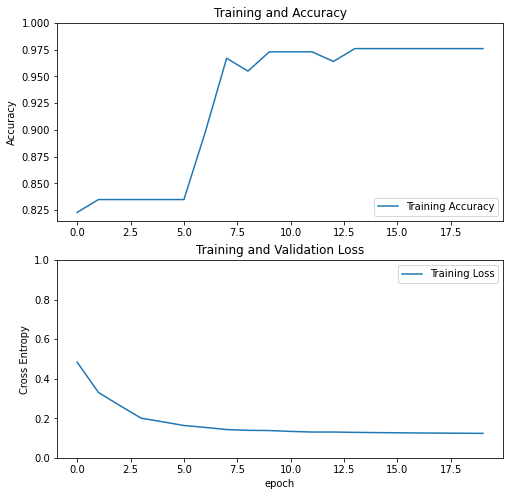

In [218]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

loss = history.history['loss']
#val_loss = history.history['val_loss']

fig, ax = plt.subplots(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
#plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
#plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
fig.savefig('NN_Accu_loss.png')

The figrue showed increase accuracy and continuous reducing of training loss in the train set.

#### Prediction using NN

In [188]:
# Get predicted probabilities and convert to binary predictions
y_pred = model.predict(data_train.iloc[:,:1535])
# view the y_pred to see what they looks like
y_pred[:15]

11/11 [==============================] - 0s 2ms/step


array([[0.9996421 ],
       [0.46901116],
       [0.99999255],
       [0.9999779 ],
       [0.9999823 ],
       [0.99957794],
       [0.99866384],
       [0.9992647 ],
       [0.99970776],
       [0.46901116],
       [0.9989016 ],
       [0.9999538 ],
       [0.46901116],
       [0.46901116],
       [0.99971485]], dtype=float32)

The y_pred are either 0.99 or 0.46. Thus, we predic that 0.5 would be a good threshold.

#### Thresholds and ROC curve

In order to get the binarized label, we need to find a threshold that best seperated the two classes.

In [189]:
#compute thresholds
fpr, tpr, thresholds = roc_curve(npy, y_pred, pos_label=0, drop_intermediate = False)
print('maximum is', thresholds.max())
print('minimum is', thresholds.min())
thresholds

maximum is 2.0
minimum is 0.46901116


array([2.        , 1.        , 0.99999994, 0.9999999 , 0.9999998 ,
       0.99999976, 0.9999997 , 0.99999964, 0.9999996 , 0.99999946,
       0.99999905, 0.999999  , 0.9999989 , 0.99999887, 0.99999875,
       0.9999983 , 0.9999982 , 0.9999973 , 0.9999971 , 0.99999636,
       0.9999962 , 0.99999607, 0.9999955 , 0.99999547, 0.9999954 ,
       0.9999951 , 0.99999505, 0.9999947 , 0.999994  , 0.99999386,
       0.99999356, 0.99999326, 0.99999315, 0.9999929 , 0.99999285,
       0.99999255, 0.99999243, 0.9999922 , 0.9999914 , 0.99999064,
       0.9999899 , 0.9999898 , 0.99998975, 0.9999897 , 0.9999896 ,
       0.99998945, 0.99998903, 0.99998873, 0.99998766, 0.9999867 ,
       0.9999861 , 0.9999858 , 0.99998534, 0.9999847 , 0.99998415,
       0.9999835 , 0.9999823 , 0.99998003, 0.9999799 , 0.9999793 ,
       0.99997914, 0.99997896, 0.9999779 , 0.99997747, 0.99997693,
       0.99997574, 0.9999734 , 0.99996924, 0.99996746, 0.99996626,
       0.99996585, 0.99996525, 0.9999646 , 0.9999597 , 0.99995

We do not understnad why maximum is 2.0 but not 1.0.

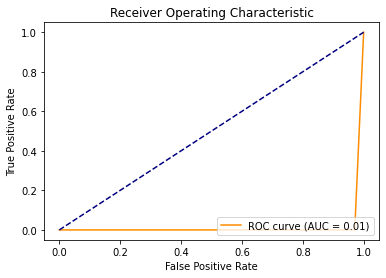

In [212]:
roc_auc = auc(fpr, tpr)
#print(fpr): steady increase
#print(tpr): stayed zero and increased to 0.9 immediately 
# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Therefore, we can use 0.5 as a thrshold for classification. 

#### Label predictions

In [213]:
npy
# This is true y_label

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [214]:
# Get predicted probabilities and convert to binary predictions
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
#we need to find a threshold for the binarization of labels
np.array(y_pred_binary)
# This is predicted y_label

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [215]:
#Evaluation quality of prediction and labeling
arrayY = np.array(y_pred_binary)
print('predicted N1 % is',arrayY.sum()/len(arrayY))
print('actual N1 % is',npy.sum()/len(npy))

predicted N1 % is 0.8108108108108109
actual N1 % is 0.8348348348348348


Our model is very preliminary, but functions really well. For furture directions, we can perform fine tuning. Some possible steps directions are:
1. Adjust learing rate to avoid overfitting.
2. Adujst penalty (L1, L2) on loss function.
3. Change the architecture with shorter activation function.
4. Batching.